"I (We) certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I (we) did not receive
any external help, coaching or contributions during the production of this work."

In [1]:
from google.colab import widgets
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import time

In [17]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.ob_space = spaces.Discrete(25)
        self.ac_area = spaces.Discrete(4)
        self.timesteps_max = 15
        self.reward = 0
        reached = False
        self.initial_pos=[0,0]
        self.goal_pos=[3,4]
        self.reward1 = [0,2]
        self.reward2 = [1,0]
        self.reward3 = [1,4]
        self.reward4 = [4,1]
        self.imshow_values=np.array([["","",5,"",""],[-15,"","","",10],["","","","",""],["","","","","win"],["",-10,"","",""]])
      
        
    def reset(self):
        self.present_timestep = 0
        self.initial_pos = [0,0]
        self.goal_pos = [3,4]
        self.reward=0
        self.reward1 = [0,2]
        self.reward2 = [1,0]
        self.reward3 = [1,4]
        self.reward4 = [4,1]
        self.state_val = np.zeros((5,5))
        self.state_val[tuple(self.initial_pos)] = 1
        self.state_val[tuple(self.goal_pos)] = 6
        self.state_val[tuple(self.reward1)] = 3
        self.state_val[tuple(self.reward2)] = -3.1
        self.state_val[tuple(self.reward3)] = -2.5
        self.state_val[tuple(self.reward4)] = -4.7
        ob = self.state_val.flatten()
        return ob
    
    def step(self, action):
        self.state_val = np.random.choice(self.ob_space.n)
      
        if action == 0:
          self.initial_pos[0] += 1
          self.action = 'Down'

        if action == 1:
          self.initial_pos[0] -= 1
          self.action = 'Up'

        if action == 2:
          self.initial_pos[1] += 1
          self.action = 'Right'

        if action == 3:
          self.initial_pos[1] -= 1
          self.action = 'Left'
   
     
        self.initial_pos = np.clip(self.initial_pos, 0, 4)
        self.state_val = np.zeros((5,5))
        self.state_val[tuple(self.initial_pos)] = 1
        self.state_val[tuple(self.goal_pos)] = 6
        self.state_val[tuple(self.reward1)] = 3
        self.state_val[tuple(self.reward2)] = -3.1
        self.state_val[tuple(self.reward3)] = -2.5
        self.state_val[tuple(self.reward4)] = -4.7
        observation = self.state_val.flatten()
        
        done = True if self.present_timestep>= self.timesteps_max else False


        if((self.initial_pos[0] == self.goal_pos[0]) and(self.initial_pos[1] == self.goal_pos[1])) :
            self.reward  += 30
            reached = True
            done = True
        
        elif ((self.initial_pos[0] == self.reward1[0]) and(self.initial_pos[1] == self.reward1[1])):
            
            self.reward += 5

        elif ((self.initial_pos[0] == self.reward2[0]) and(self.initial_pos[1] == self.reward2[1])):
            print("yay")
            self.reward += -15

        elif ((self.initial_pos[0] == self.reward3[0]) and(self.initial_pos[1] == self.reward3[1])):
            self.reward += 10

        elif ((self.initial_pos[0] == self.reward4[0]) and(self.initial_pos[1] == self.reward4[1])):
            self.reward += -10

        self.present_timestep += 1
        
        info = {}
        self.render()
        print('\n Position =',self.initial_pos, '|| Total Reward=', self.reward, '|| Action Taken =', self.action, 'Goal =',done)
        return observation,self.reward,action,done,info
        
    def render(self):
        fig, ax = plt.subplots(1,1,figsize=(5, 5))

        ax.imshow(self.state_val,interpolation='nearest',aspect="auto")
        ax.set_xticklabels([0," ",1," ",2," ",3," ",4])
        ax.set_yticklabels([0," ",1," ",2," ",3," ",4])

        for (j,i),label in np.ndenumerate(self.imshow_values):
          ax.text(i,j,label,ha='center',va='center',size=25,color="white")
    
        plt.show()

In [18]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.ob_space = env.ob_space
    self.ac_area = env.ac_area

  def step(self, observe_value):
    return np.random.choice(self.ac_area.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

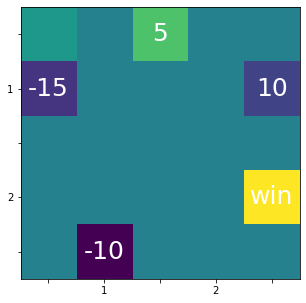

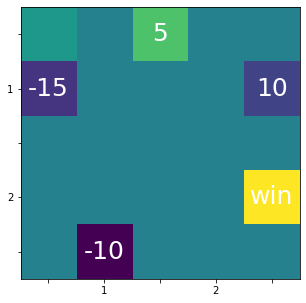


 Position = [0 0] || Total Reward= 0 || Action Taken = Up Goal = False


""


<IPython.core.display.Javascript object>

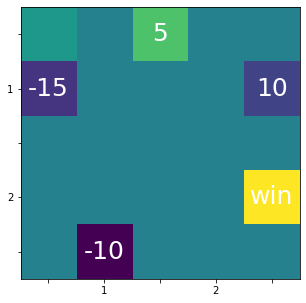


 Position = [0 0] || Total Reward= 0 || Action Taken = Left Goal = False


""


<IPython.core.display.Javascript object>

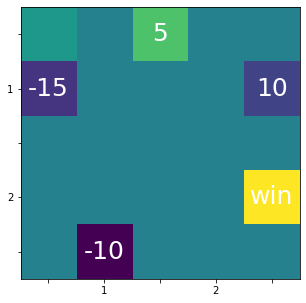


 Position = [0 0] || Total Reward= 0 || Action Taken = Up Goal = False


""


<IPython.core.display.Javascript object>

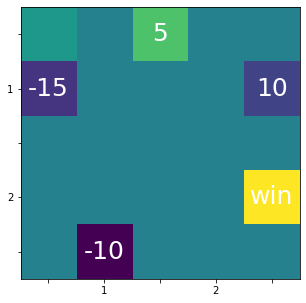


 Position = [0 0] || Total Reward= 0 || Action Taken = Up Goal = False


""


<IPython.core.display.Javascript object>

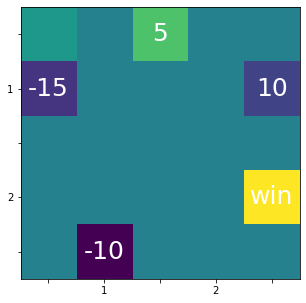


 Position = [0 0] || Total Reward= 0 || Action Taken = Left Goal = False


""


<IPython.core.display.Javascript object>

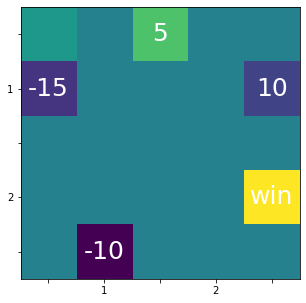


 Position = [0 0] || Total Reward= 0 || Action Taken = Left Goal = False


""


<IPython.core.display.Javascript object>

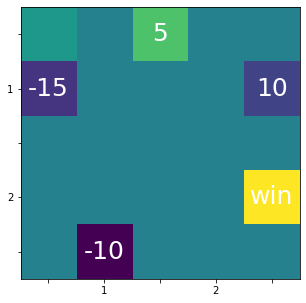


 Position = [0 0] || Total Reward= 0 || Action Taken = Up Goal = False


""


<IPython.core.display.Javascript object>

yay


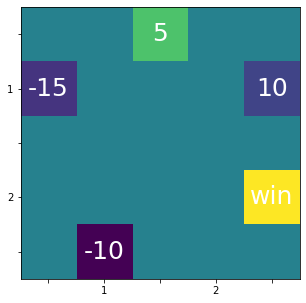


 Position = [1 0] || Total Reward= -15 || Action Taken = Down Goal = False


""


<IPython.core.display.Javascript object>

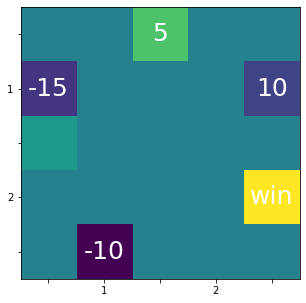


 Position = [2 0] || Total Reward= -15 || Action Taken = Down Goal = False


""


<IPython.core.display.Javascript object>

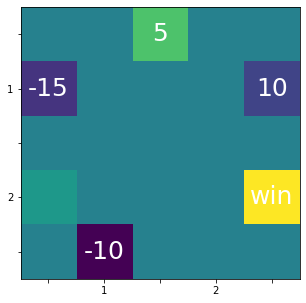


 Position = [3 0] || Total Reward= -15 || Action Taken = Down Goal = False


""


<IPython.core.display.Javascript object>

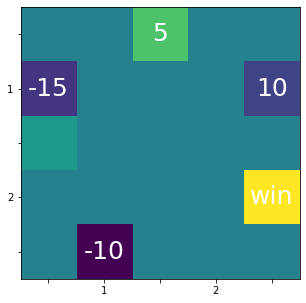


 Position = [2 0] || Total Reward= -15 || Action Taken = Up Goal = False


""


<IPython.core.display.Javascript object>

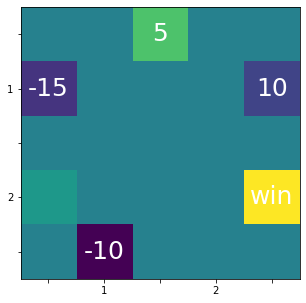


 Position = [3 0] || Total Reward= -15 || Action Taken = Down Goal = False


""


<IPython.core.display.Javascript object>

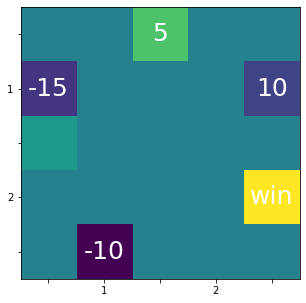


 Position = [2 0] || Total Reward= -15 || Action Taken = Up Goal = False


""


<IPython.core.display.Javascript object>

yay


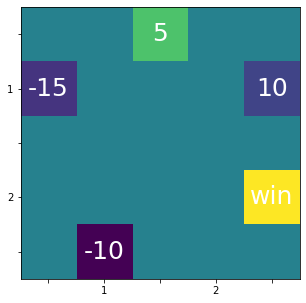


 Position = [1 0] || Total Reward= -30 || Action Taken = Up Goal = False


""


<IPython.core.display.Javascript object>

yay


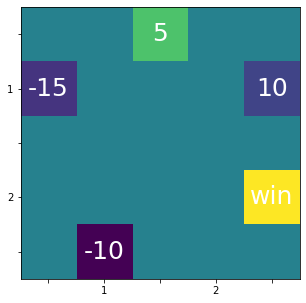


 Position = [1 0] || Total Reward= -45 || Action Taken = Left Goal = False


""


<IPython.core.display.Javascript object>

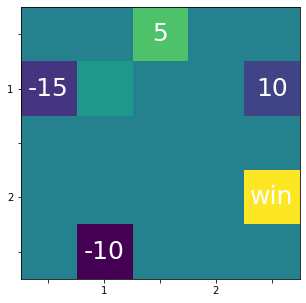


 Position = [1 1] || Total Reward= -45 || Action Taken = Right Goal = True


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
env = GridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()


  while not done:
    action = agent.step(obs)
    obs, reward, act,done, info = env.step(action)
    output_grid = widgets.Grid(1, 1)
    with output_grid.output_to(0, 0):
      #env.render()
      output_grid.clear_cell()
    time.sleep(1)

PART 2

In [2]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.ob_space = spaces.Discrete(25)
        self.ac_area = spaces.Discrete(4)
        self.timesteps_max = 15
        self.reward = 0
        reached = False
        self.initial_pos=[0,0]
        self.goal_pos=[3,4]
        self.reward1 = [0,2]
        self.reward2 = [1,0]
        self.reward3 = [1,4]
        self.reward4 = [4,1]
        self.imshow_values=np.array([["","",25,"",""],[-15,"","","",10],["","","","",""],["","","","","win"],["",-10,"","",""]])
      
        
    def reset(self):
        self.present_timestep = 0
        self.initial_pos = [0,0]
        self.goal_pos = [3,4]
        self.reward=0
        self.reward1 = [0,2]
        self.reward2 = [1,0]
        self.reward3 = [1,4]
        self.reward4 = [4,1]
        self.state_val = np.zeros((5,5))
        self.state_val[tuple(self.initial_pos)] = 1
        self.state_val[tuple(self.goal_pos)] = 6
        self.state_val[tuple(self.reward1)] = 3
        self.state_val[tuple(self.reward2)] = -3.1
        self.state_val[tuple(self.reward3)] = -2.5
        self.state_val[tuple(self.reward4)] = -4.7
        ob = self.state_val.flatten()
        sp = self.initial_pos[0]*4 + self.initial_pos[1]
        return ob,sp
    
    def step(self, action):
        self.state_val = np.random.choice(self.ob_space.n)
      
        if action == 0:
          self.initial_pos[0] += 1
          self.action = 'Down'

        if action == 1:
          self.initial_pos[0] -= 1
          self.action = 'Up'

        if action == 2:
          self.initial_pos[1] += 1
          self.action = 'Right'

        if action == 3:
          self.initial_pos[1] -= 1
          self.action = 'Left'
   
     
        self.initial_pos = np.clip(self.initial_pos, 0, 4)
        self.state_val = np.zeros((5,5))
        self.state_val[tuple(self.initial_pos)] = 1
        self.state_val[tuple(self.goal_pos)] = 6
        self.state_val[tuple(self.reward1)] = 3
        self.state_val[tuple(self.reward2)] = -3.1
        self.state_val[tuple(self.reward3)] = -2.5
        self.state_val[tuple(self.reward4)] = -4.7
        observation = self.state_val.flatten()
        
        done = True if self.present_timestep>= self.timesteps_max else False


        if((self.initial_pos[0] == self.goal_pos[0]) and(self.initial_pos[1] == self.goal_pos[1])) :
            self.reward  += 30
            reached = True
            done = True
        
        elif ((self.initial_pos[0] == self.reward1[0]) and(self.initial_pos[1] == self.reward1[1])):
            
            self.reward += 25

        elif ((self.initial_pos[0] == self.reward2[0]) and(self.initial_pos[1] == self.reward2[1])):
            self.reward += -15

        elif ((self.initial_pos[0] == self.reward3[0]) and(self.initial_pos[1] == self.reward3[1])):
            self.reward += 10

        elif ((self.initial_pos[0] == self.reward4[0]) and(self.initial_pos[1] == self.reward4[1])):
            self.reward += -10


        self.present_timestep += 1
        
        
        #self.render()
        print('\n Position =',self.initial_pos, '|| Total Reward=', self.reward, '|| Action Taken =', self.action, 'Goal =',done)
        return self.initial_pos,self.reward,done
        
    def render(self):
        fig, ax = plt.subplots(1,1,figsize=(5, 5))

        ax.imshow(self.state_val,interpolation='nearest',aspect="auto")
        ax.set_xticklabels([0," ",1," ",2," ",3," ",4])
        ax.set_yticklabels([0," ",1," ",2," ",3," ",4])

        for (j,i),label in np.ndenumerate(self.imshow_values):
          ax.text(i,j,label,ha='center',va='center',size=25,color="white")
    
        plt.show()

E-greedy for choosing action 

In [3]:
def e_greedy(present):
  if np.random.uniform(0,1) < epslon:
    return env.ac_area.sample()
  else:
    return np.argmax(qtable[present])

SARSA Implementation 

In [4]:
env = GridEnvironment() #Creating environment


episodes = 1000 #Defining number of episodes to run
max_steps = 25  #max steps before episode ends
l = 0.001 #learning rate
disc = 0.92 #discount factor
qtable = np.zeros((25,4))  #qtable 
epslon = 0.8  #Epsilon 
rew = []
edcay = []


for i in range(episodes):
  steps = 0
  rewards = 0
  p,present_s = env.reset()
  action = e_greedy(present_s)
  done = False
  for i in range(max_steps):
    next_state,r,done = env.step(action)
    ss = (next_state[0]*4)+next_state[1]
    next_action = e_greedy(ss)
    qtable[present_s,action] = qtable[present_s,action]+ (l*(r+(disc*qtable[ss,next_action])-qtable[present_s,action]))
    present_s = ss
    action = next_action
    rewards += r
    steps = steps +1
    if done:
      break
  rew.append(rewards)
  edcay.append(epslon)
  epslon = epslon * 0.99


Streaming output truncated to the last 5000 lines.

 Position = [1 2] || Total Reward= 75 || Action Taken = Left Goal = False

 Position = [0 2] || Total Reward= 100 || Action Taken = Up Goal = False

 Position = [0 3] || Total Reward= 100 || Action Taken = Right Goal = False

 Position = [1 3] || Total Reward= 100 || Action Taken = Down Goal = True

 Position = [0 1] || Total Reward= 0 || Action Taken = Right Goal = False

 Position = [0 2] || Total Reward= 25 || Action Taken = Right Goal = False

 Position = [0 3] || Total Reward= 25 || Action Taken = Right Goal = False

 Position = [1 3] || Total Reward= 25 || Action Taken = Down Goal = False

 Position = [1 2] || Total Reward= 25 || Action Taken = Left Goal = False

 Position = [0 2] || Total Reward= 50 || Action Taken = Up Goal = False

 Position = [0 3] || Total Reward= 50 || Action Taken = Right Goal = False

 Position = [1 3] || Total Reward= 50 || Action Taken = Down Goal = False

 Position = [1 2] || Total Reward= 50 || Actio

Q-table values after SARSA 

In [5]:
print(qtable)

[[-9.01008771e-01 -2.81123204e-01  1.99622001e+01 -2.66899341e-01]
 [ 4.58243072e-03  1.08907312e-01  7.17791028e+01 -4.67712168e-02]
 [ 2.96921554e+00  3.55367999e+00  1.69275343e+02  2.49482036e+00]
 [ 1.61117972e+02  1.84499017e+00  1.98557875e+00  3.11366909e+00]
 [ 8.25914815e-01  1.65435970e-01  1.07548145e+01  4.33058718e-01]
 [-2.98516873e-01  5.50544947e-01 -2.56223787e-01 -3.19764511e-01]
 [ 1.35885083e+00  1.73405283e+02  2.21779501e+00  8.93923766e-01]
 [ 1.44328552e+00  1.81205549e+00  1.92604950e+00  1.52470273e+02]
 [ 7.51510643e-02  2.07338154e+00  2.53323054e-02  1.00180518e-01]
 [-6.98675846e-02 -1.05615781e-01 -8.50495295e-02 -1.04311513e-01]
 [-8.48047065e-02  1.33791364e+00 -6.98314926e-02  6.86629683e-02]
 [ 1.79862986e-01  1.20935867e+00  1.44659448e-01  8.05714657e-02]
 [ 1.04466635e-01  4.00827795e-02  8.50156246e-02  2.01285303e-02]
 [-7.99750000e-02 -7.01043065e-02 -3.00000000e-02 -1.98342203e-02]
 [-3.50575775e-02 -2.99449096e-02 -4.46498874e-02 -4.50230000e

Plotting Rewards after each episode

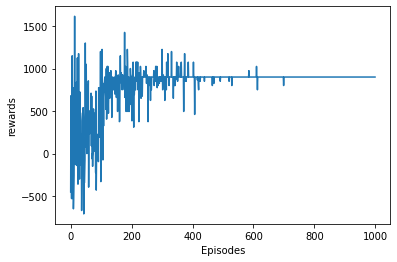

In [6]:
plt.plot(rew)
plt.xlabel('Episodes')
plt.ylabel('rewards')
plt.show()

Cumulative reward graph

In [ ]:
for i in range(1,len(rew)):
  rew[i] = rew[i]+rew[i-1]

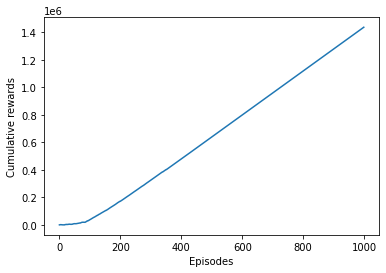

In [ ]:
plt.plot(rew)
plt.xlabel('Episodes')
plt.ylabel('Cumulative rewards')
plt.show()

Epsilon Decay graph

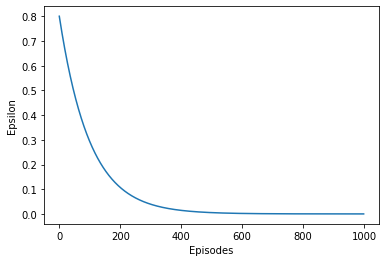

In [7]:
plt.plot(edcay)
plt.xlabel("Episodes")
plt.ylabel("Epsilon")
plt.show()

15 Episodes using just the greedy actions - we can see after few iterations we are taking same route always 



In [8]:
env = GridEnvironment() 


episodes = 15 #Defining number of episodes to run
max_steps = 25  #max steps before episode ends
l = 0.001 #learning rate
disc = 0.92 #discount factor
qtable = np.zeros((25,4))  #qtable 
rew = []
edcay = []


for i in range(episodes):
  steps = 0
  rewards = 0
  p,present_s = env.reset()
  action = np.argmax(qtable[present_s])

  done = False
  for i in range(max_steps):
    next_state,r,done = env.step(action)
    ss = (next_state[0]*4)+next_state[1]
    next_action = np.argmax(qtable[ss])
    qtable[present_s,action] = qtable[present_s,action]+ (l*(r+(disc*qtable[ss,next_action])-qtable[present_s,action]))
    present_s = ss
    action = next_action
    rewards += r
    steps = steps +1
    if done:
      break
  rew.append(rewards)


 Position = [1 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [2 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [3 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [4 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [4 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [4 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [3 0] || Total Reward= -15 || Action Taken = Up Goal = False

 Position = [2 0] || Total Reward= -15 || Action Taken = Up Goal = False

 Position = [1 0] || Total Reward= -30 || Action Taken = Up Goal = False

 Position = [0 0] || Total Reward= -30 || Action Taken = Up Goal = False

 Position = [0 0] || Total Reward= -30 || Action Taken = Up Goal = False

 Position = [0 0] || Total Reward= -30 || Action Taken = Up Goal = False

 Position = [0 1] || Total Reward= -30 || Action Taken = Right Goal = False

 Position = [1 1] || T

In [9]:
print(qtable)

[[-0.015    -0.05997  -0.03      0.      ]
 [-0.03      0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [-0.015    -0.03      0.        0.      ]
 [-0.03      0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [-0.015    -0.03      0.        0.      ]
 [-0.03      0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [-0.015    -0.015     0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [-0.029985 -0.015     0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.      

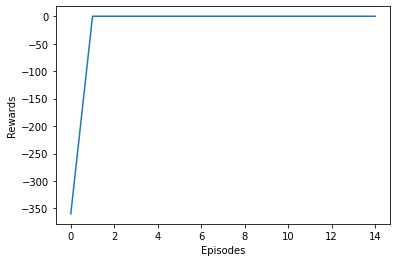

In [10]:
plt.plot(rew)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()

hyperparameter Tuning epsilon decay rate - 0.1


 Position = [0 0] || Total Reward= 0 || Action Taken = Up Goal = False

 Position = [0 0] || Total Reward= 0 || Action Taken = Up Goal = False

 Position = [1 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [1 0] || Total Reward= -30 || Action Taken = Left Goal = False

 Position = [1 1] || Total Reward= -30 || Action Taken = Right Goal = False

 Position = [1 0] || Total Reward= -45 || Action Taken = Left Goal = False

 Position = [2 0] || Total Reward= -45 || Action Taken = Down Goal = False

 Position = [1 0] || Total Reward= -60 || Action Taken = Up Goal = False

 Position = [0 0] || Total Reward= -60 || Action Taken = Up Goal = False

 Position = [0 1] || Total Reward= -60 || Action Taken = Right Goal = False

 Position = [0 1] || Total Reward= -60 || Action Taken = Up Goal = False

 Position = [1 1] || Total Reward= -60 || Action Taken = Down Goal = False

 Position = [1 2] || Total Reward= -60 || Action Taken = Right Goal = False

 Position = [2 2] || T

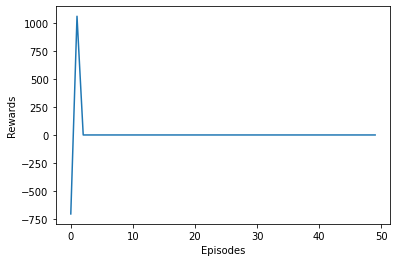

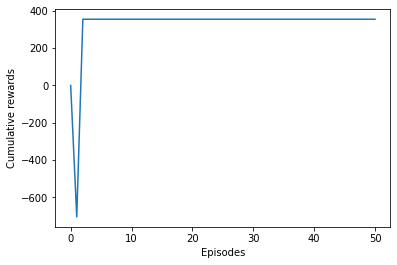

In [11]:
env = GridEnvironment() 

episodes = 50 
max_steps = 25  
l = 0.001 
disc = 0.9 #discount factor
qtable = np.zeros((25,4))
epslon = 0.9
rew = []
cumrew = [0]
edcay = []


for i in range(episodes):
  steps = 0
  rewards = 0
  p,present_s = env.reset()
  action = e_greedy(present_s)
  done = False
  for i in range(max_steps):
    next_state,r,done = env.step(action)
    ss = (next_state[0]*4)+next_state[1]
    next_action = e_greedy(ss)
    qtable[present_s,action] = qtable[present_s,action]+ (l*(r+(disc*qtable[ss,next_action])-qtable[present_s,action]))
    present_s = ss
    action = next_action
    rewards += r
    steps = steps +1
    if done:
      break
  rew.append(rewards)
  cumrew.append(cumrew[-1]+rewards)
  edcay.append(epslon)
  epslon = epslon * 0.1 ## decay rate


plt.plot(rew)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()


plt.plot(cumrew)
plt.xlabel("Episodes")
plt.ylabel("Cumulative rewards")
plt.show()

Epsilon decay rate - 0.5


 Position = [1 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [0 0] || Total Reward= -15 || Action Taken = Up Goal = False

 Position = [0 1] || Total Reward= -15 || Action Taken = Right Goal = False

 Position = [1 1] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [1 0] || Total Reward= -30 || Action Taken = Left Goal = False

 Position = [1 0] || Total Reward= -45 || Action Taken = Left Goal = False

 Position = [1 0] || Total Reward= -60 || Action Taken = Left Goal = False

 Position = [2 0] || Total Reward= -60 || Action Taken = Down Goal = False

 Position = [2 1] || Total Reward= -60 || Action Taken = Right Goal = False

 Position = [3 1] || Total Reward= -60 || Action Taken = Down Goal = False

 Position = [3 0] || Total Reward= -60 || Action Taken = Left Goal = False

 Position = [3 0] || Total Reward= -60 || Action Taken = Left Goal = False

 Position = [2 0] || Total Reward= -60 || Action Taken = Up Goal = False

 Position = [

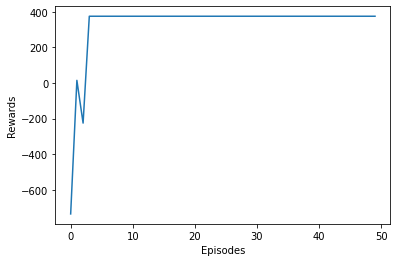

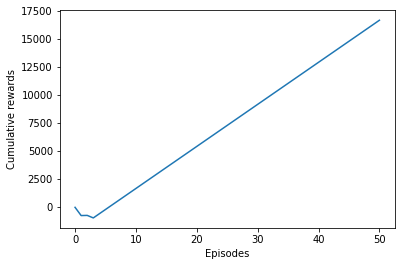

In [12]:
env = GridEnvironment() 

episodes = 50 
max_steps = 25 
l = 0.001 
disc = 0.9 #discount factor
qtable = np.zeros((25,4))  
epslon = 0.9
rew = []
cumrew=[0]
edcay = []


for i in range(episodes):
  steps = 0
  rewards = 0
  p,present_s = env.reset()
  action = e_greedy(present_s)
  done = False
  for i in range(max_steps):
    next_state,r,done = env.step(action)
    ss = (next_state[0]*4)+next_state[1]
    next_action = e_greedy(ss)
    qtable[present_s,action] = qtable[present_s,action]+ (l*(r+(disc*qtable[ss,next_action])-qtable[present_s,action]))
    present_s = ss
    action = next_action
    rewards += r
    steps = steps +1
    if done:
      break
  rew.append(rewards)
  cumrew.append(cumrew[-1]+rewards)
  edcay.append(epslon)
  epslon = epslon * 0.5 ## decay rate

plt.plot(rew)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()


plt.plot(cumrew)
plt.xlabel("Episodes")
plt.ylabel("Cumulative rewards")
plt.show()

Epsilon decay rate - 0.8


 Position = [1 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [1 0] || Total Reward= -30 || Action Taken = Left Goal = False

 Position = [1 1] || Total Reward= -30 || Action Taken = Right Goal = False

 Position = [1 0] || Total Reward= -45 || Action Taken = Left Goal = False

 Position = [0 0] || Total Reward= -45 || Action Taken = Up Goal = False

 Position = [0 0] || Total Reward= -45 || Action Taken = Up Goal = False

 Position = [1 0] || Total Reward= -60 || Action Taken = Down Goal = False

 Position = [1 1] || Total Reward= -60 || Action Taken = Right Goal = False

 Position = [2 1] || Total Reward= -60 || Action Taken = Down Goal = False

 Position = [3 1] || Total Reward= -60 || Action Taken = Down Goal = False

 Position = [3 0] || Total Reward= -60 || Action Taken = Left Goal = False

 Position = [4 0] || Total Reward= -60 || Action Taken = Down Goal = False

 Position = [4 0] || Total Reward= -60 || Action Taken = Left Goal = False

 Position = [

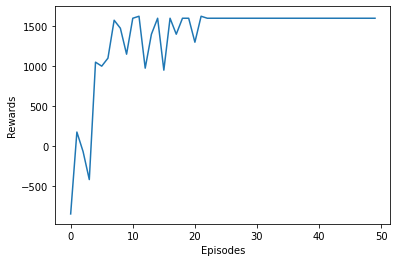

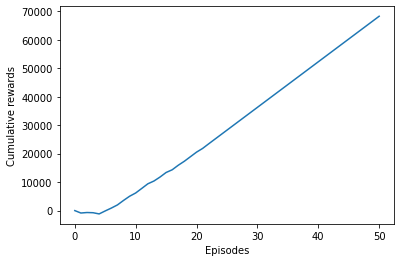

In [13]:
env = GridEnvironment() 

episodes = 50 
max_steps = 25 
l = 0.001 
disc = 0.9 #discount factor
qtable = np.zeros((25,4))  
epslon = 0.9 
rew = []
cumrew =[0]
edcay = []


for i in range(episodes):
  steps = 0
  rewards = 0
  p,present_s = env.reset()
  action = e_greedy(present_s)
  done = False
  for i in range(max_steps):
    next_state,r,done = env.step(action)
    ss = (next_state[0]*4)+next_state[1]
    next_action = e_greedy(ss)
    qtable[present_s,action] = qtable[present_s,action]+ (l*(r+(disc*qtable[ss,next_action])-qtable[present_s,action]))
    present_s = ss
    action = next_action
    rewards += r
    steps = steps +1
    if done:
      break
  rew.append(rewards)
  cumrew.append(cumrew[-1]+rewards)
  edcay.append(epslon)
  epslon = epslon * 0.8 ## decay rate

plt.plot(rew)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()


plt.plot(cumrew)
plt.xlabel("Episodes")
plt.ylabel("Cumulative rewards")
plt.show()

Max time steps - 3


 Position = [0 0] || Total Reward= 0 || Action Taken = Up Goal = False

 Position = [0 0] || Total Reward= 0 || Action Taken = Left Goal = False

 Position = [0 0] || Total Reward= 0 || Action Taken = Up Goal = False

 Position = [1 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [1 1] || Total Reward= -15 || Action Taken = Right Goal = False

 Position = [2 1] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [0 0] || Total Reward= 0 || Action Taken = Left Goal = False

 Position = [0 0] || Total Reward= 0 || Action Taken = Up Goal = False

 Position = [0 0] || Total Reward= 0 || Action Taken = Up Goal = False

 Position = [0 0] || Total Reward= 0 || Action Taken = Left Goal = False

 Position = [0 0] || Total Reward= 0 || Action Taken = Up Goal = False

 Position = [1 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [0 1] || Total Reward= 0 || Action Taken = Right Goal = False

 Position = [1 1] || Total Reward= 0 

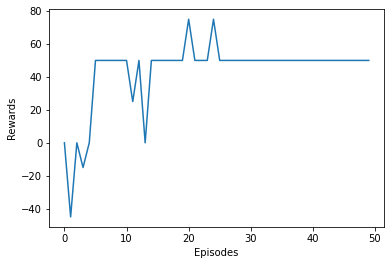

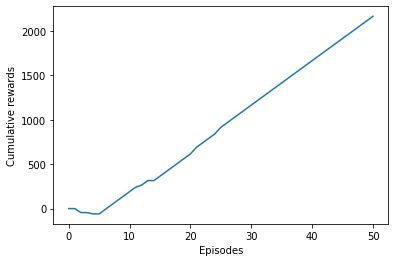

In [14]:
env = GridEnvironment() 

episodes = 50 
max_steps = 3
l = 0.001 
disc = 0.9 
qtable = np.zeros((25,4))  
epslon = 0.9  
rew = []
cumrew =[0]
edcay = []


for i in range(episodes):
  steps = 0
  rewards = 0
  p,present_s = env.reset()
  action = e_greedy(present_s)
  done = False
  for i in range(max_steps):
    next_state,r,done = env.step(action)
    ss = (next_state[0]*4)+next_state[1]
    next_action = e_greedy(ss)
    qtable[present_s,action] = qtable[present_s,action]+ (l*(r+(disc*qtable[ss,next_action])-qtable[present_s,action]))
    present_s = ss
    action = next_action
    rewards += r
    steps = steps +1
    if done:
      break
  rew.append(rewards)
  cumrew.append(cumrew[-1]+rewards)
  edcay.append(epslon)
  epslon = epslon * 0.9 ## decay rate

plt.plot(rew)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()


plt.plot(cumrew)
plt.xlabel("Episodes")
plt.ylabel("Cumulative rewards")
plt.show()

Max steps - 30


 Position = [0 0] || Total Reward= 0 || Action Taken = Left Goal = False

 Position = [1 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [0 0] || Total Reward= -15 || Action Taken = Up Goal = False

 Position = [0 0] || Total Reward= -15 || Action Taken = Up Goal = False

 Position = [0 0] || Total Reward= -15 || Action Taken = Up Goal = False

 Position = [0 1] || Total Reward= -15 || Action Taken = Right Goal = False

 Position = [0 1] || Total Reward= -15 || Action Taken = Up Goal = False

 Position = [1 1] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [1 0] || Total Reward= -30 || Action Taken = Left Goal = False

 Position = [2 0] || Total Reward= -30 || Action Taken = Down Goal = False

 Position = [3 0] || Total Reward= -30 || Action Taken = Down Goal = False

 Position = [4 0] || Total Reward= -30 || Action Taken = Down Goal = False

 Position = [4 0] || Total Reward= -30 || Action Taken = Left Goal = False

 Position = [3 0] ||

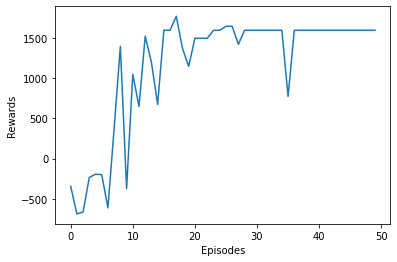

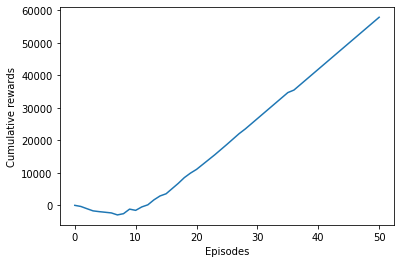

In [15]:
env = GridEnvironment() 

episodes = 50 
max_steps = 30
l = 0.001 
disc = 0.9 
qtable = np.zeros((25,4))  
epslon = 0.9  
rew = []
cumrew =[0]
edcay = []


for i in range(episodes):
  steps = 0
  rewards = 0
  p,present_s = env.reset()
  action = e_greedy(present_s)
  done = False
  for i in range(max_steps):
    next_state,r,done = env.step(action)
    ss = (next_state[0]*4)+next_state[1]
    next_action = e_greedy(ss)
    qtable[present_s,action] = qtable[present_s,action]+ (l*(r+(disc*qtable[ss,next_action])-qtable[present_s,action]))
    present_s = ss
    action = next_action
    rewards += r
    steps = steps +1
    if done:
      break
  rew.append(rewards)
  cumrew.append(cumrew[-1]+rewards)
  edcay.append(epslon)
  epslon = epslon * 0.9 ## decay rate

plt.plot(rew)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()


plt.plot(cumrew)
plt.xlabel("Episodes")
plt.ylabel("Cumulative rewards")
plt.show()

Max steps - 100


 Position = [1 0] || Total Reward= -15 || Action Taken = Down Goal = False

 Position = [1 0] || Total Reward= -30 || Action Taken = Left Goal = False

 Position = [2 0] || Total Reward= -30 || Action Taken = Down Goal = False

 Position = [2 0] || Total Reward= -30 || Action Taken = Left Goal = False

 Position = [3 0] || Total Reward= -30 || Action Taken = Down Goal = False

 Position = [4 0] || Total Reward= -30 || Action Taken = Down Goal = False

 Position = [4 0] || Total Reward= -30 || Action Taken = Down Goal = False

 Position = [4 0] || Total Reward= -30 || Action Taken = Down Goal = False

 Position = [4 0] || Total Reward= -30 || Action Taken = Down Goal = False

 Position = [4 0] || Total Reward= -30 || Action Taken = Down Goal = False

 Position = [3 0] || Total Reward= -30 || Action Taken = Up Goal = False

 Position = [3 1] || Total Reward= -30 || Action Taken = Right Goal = False

 Position = [2 1] || Total Reward= -30 || Action Taken = Up Goal = False

 Position = [1

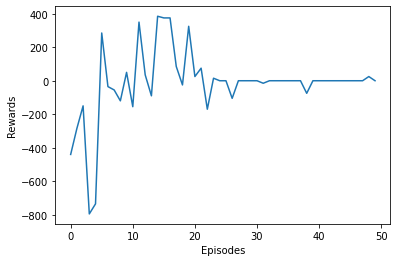

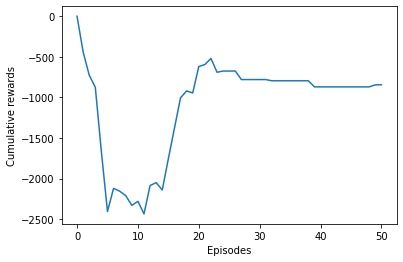

In [16]:
env = GridEnvironment() 

episodes = 50 
max_steps = 100
l = 0.001 
disc = 0.9 
qtable = np.zeros((25,4))  
epslon = 0.9  
rew = []
cumrew =[0]
edcay = []


for i in range(episodes):
  steps = 0
  rewards = 0
  p,present_s = env.reset()
  action = e_greedy(present_s)
  done = False
  for i in range(max_steps):
    next_state,r,done = env.step(action)
    ss = (next_state[0]*4)+next_state[1]
    next_action = e_greedy(ss)
    qtable[present_s,action] = qtable[present_s,action]+ (l*(r+(disc*qtable[ss,next_action])-qtable[present_s,action]))
    present_s = ss
    action = next_action
    rewards += r
    steps = steps +1
    if done:
      break
  rew.append(rewards)
  cumrew.append(cumrew[-1]+rewards)
  edcay.append(epslon)
  epslon = epslon * 0.9 ## decay rate

plt.plot(rew)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.show()


plt.plot(cumrew)
plt.xlabel("Episodes")
plt.ylabel("Cumulative rewards")
plt.show()